# 1. Intro

## 1.a Примеры использования ml в жизни

1. Медицинская диагностика (анализ снимков). Преимущества: высокая точность, снижение нагрузки на врачей, раннее выявление заболеваний. Тип: Многоклассовая классификация.
2. Распознавание лиц в смартфоне (FaceID). Преимущества: обеспечение безопасности, удобство использования. Тип: Бинарная классификация.
3. Типизация отзывов (позитивный/негативный). Преимущество: удобство для пользователя. Тип: Бинарная классификация (позитивный/негативный).
4.  Прогноз погоды. Преимущество: Четкое планирование на основе данных прогноза. Тип: Регрессия.
5.  Кластеризация вин по химическому составу. Преимущество: Разработка рекомендательной системы, обнаружение новых паттернов. Тип: Кластеризация.

## 1.b

1. Прогноз цены на дом. Тип: регрессия;
2. Предсказать, вернет ли клиент кредит. Тип: бинарная классификация;
3. Предсказать, когда пациенту необходимо принять лекарство. Тип: регрессия/многоклассовая классификация;
4. Выберите, какое лекарство из имеющихся следует принять пациенту. Тип: многоклассовая классификация;
5. Выберите сегмент клиентов для промо-коммуникации. Тип: кластеризация/классификация;
6. Распознавание дефектной продукции на производственной линии (на основе фотосканирования). Тип: бинарная классификация;
7. Решить, как разместить товары на полке в магазине. Тип: кластеризация/ассоциация;
8. Поиск сайтов по вводу текстового запроса. Тип: классификация;
9. Разделите покупателей магазина на сегменты, чтобы понять различия в их поведении. Тип: кластеризация;
10. Обнаружение аномалий в трафике сайта. Тип: классификация.

## 1.c

multiclass: объект может принадлежать только к 1 типу класса. multilabel: объект может иметь сразу несколько меток. Пример: вино красное или белое (multiclass). Фильм может быть комедией и мюзиклом одновременно (multilabel).

## 1.d

Пример с прогнозированием цены является задачей регрессии, тк цена - непрерывная величина. Можно свести задачу к задаче классификации если разделить цену на диапазоны (дешево, средне, дорого).

# 2.

## 2.a

In [1]:
import pandas as pd
import numpy as np
import sklearn
import lightgbm
import scipy
import statsmodels
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

## 2.b

In [2]:
df = pd.read_json('train.json')
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


## 2.c

Каков размер (количество строк и столбцов) ваших данных: 49352 rows × 15 columns

## 2.d

In [3]:
print(df.columns.tolist())

['bathrooms', 'bedrooms', 'building_id', 'created', 'description', 'display_address', 'features', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 'price', 'street_address', 'interest_level']


Какой столбец является целевым: price.

## 2.e

In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


Нулевых столбцов нет

In [5]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


Основные статистические характеристики: count (непустые значения), mean (среднее), std (отклонение от среднего), min, max, перцентили (значение ниже которого лежат n% данных).

In [6]:
df['interest_level_enc'] = df['interest_level'].map({'low': 0, 'medium': 1, 'high': 2})
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
corr_matrix

,bathrooms,bedrooms,latitude,listing_id,longitude,price,interest_level_enc
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661,-0.082573
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788,0.027293
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707,0.004804
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090,-0.026487
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087,-0.004752
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000,-0.023783
interest_level_enc,-0.082573,0.027293,0.004804,-0.026487,-0.004752,-0.023783,1.000000


корреляционная матрица показывает насколько признаки коррелируют между собой.

## 2.f

In [7]:
new_df=df[['bathrooms','bedrooms', 'interest_level_enc','price']]
new_df

,bathrooms,bedrooms,interest_level_enc,price
4,1.0,1,1,2400
6,1.0,2,0,3800
9,1.0,2,1,3495
10,1.5,3,1,3000
15,1.0,0,0,2795
...,...,...,...,...
124000,1.0,3,0,2800
124002,1.0,2,1,2395
124004,1.0,1,1,1850
124008,1.0,2,1,4195


# 3. Анализ данных

## 3.c.1 Гистограмма распределения цены

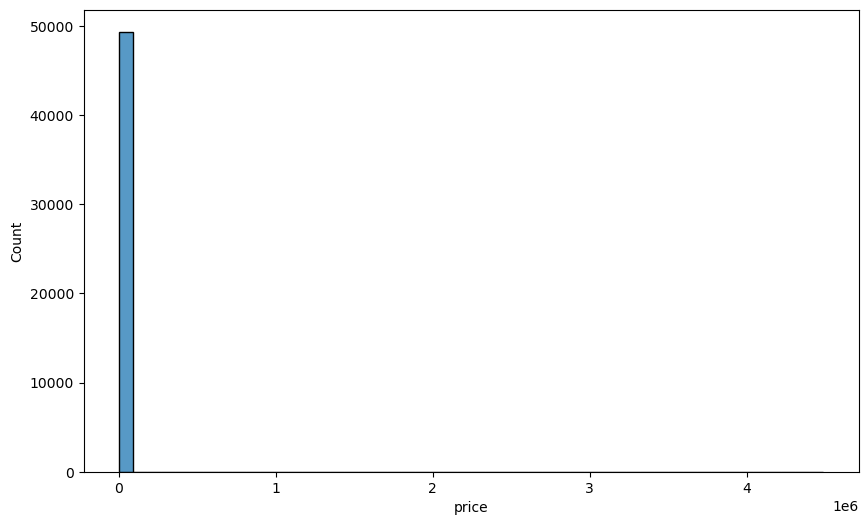

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50)
plt.show()

Согласно гистограмме большинство данных попадают в диапазон значений первого бина [0;89800]

## 3.c.2 Boxplot распределения цены

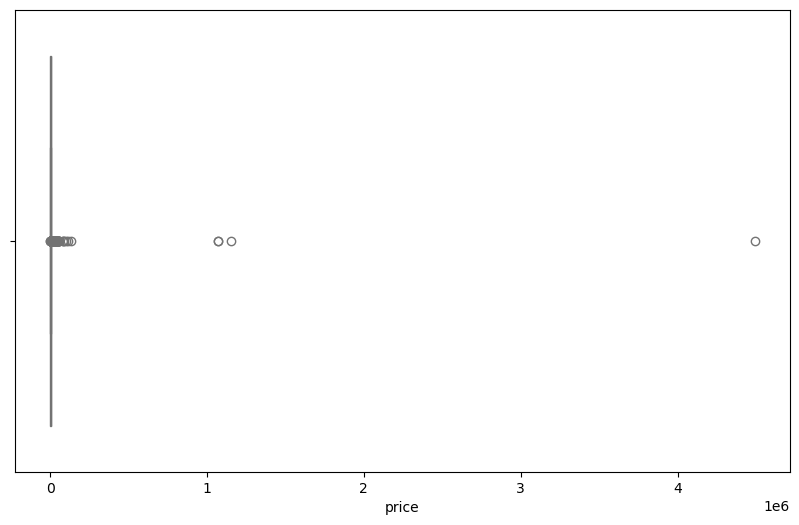

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df, x='price', color='lightgreen')
plt.show()

Согласно boxplot наблюдаются сильные правосторонние выбросы

## 3.c.3 Удалим из целевого столбца строки, находящиеся за пределами 1 и 99 перцентилей.

In [10]:
lower = new_df['price'].quantile(0.01) 
upper = new_df['price'].quantile(0.99) 
filtered_df = new_df[(new_df['price'] >= lower) & (new_df['price'] <= upper)] 


In [11]:
filtered_df['price'].describe()

count    48379.000000
mean      3538.636888
std       1597.663167
min       1475.000000
25%       2500.000000
50%       3150.000000
75%       4065.000000
max      13000.000000
Name: price, dtype: float64

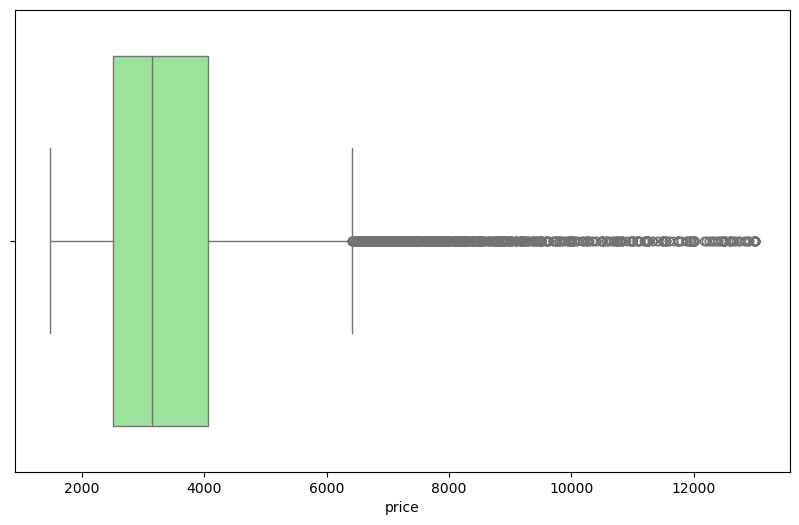

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='price', color='lightgreen', whis = 1.5)
plt.show()

Согласно boxplot мы избавились от сильных выбросов, но не смотря на это наблюдается правосторонняя ассиметрия в данных.

## 3.d Анализ характеристик

## 3.d.1

In [13]:
print(df['interest_level'].dtype)  

object


## 3.d.2

In [14]:
value_counts = df['interest_level'].value_counts()
print(value_counts)

interest_level
low       34284
medium    11229
high       3839
Name: count, dtype: int64


In [57]:
filtered_df.describe()

,bathrooms,bedrooms,interest_level_enc,price,price_per_room,total_rooms,bedrooms_squared
count,48379.000000,48379.000000,48379.000000,48379.000000,48379.000,48379.000000,48379.000000
mean,1.195198,1.534633,0.377188,3538.636888,inf,2.729831,3.568325
std,0.456495,1.101477,0.618340,1597.663167,NaN,1.393604,4.205796
min,0.000000,0.000000,0.000000,1475.000000,187.875,0.000000,0.000000
25%,1.000000,1.000000,0.000000,2500.000000,1000.000,2.000000,1.000000
50%,1.000000,1.000000,0.000000,3150.000000,1300.000,2.000000,1.000000
75%,1.000000,2.000000,1.000000,4065.000000,1850.000,4.000000,4.000000
max,10.000000,8.000000,2.000000,13000.000000,inf,12.000000,64.000000


In [58]:
value_counts = filtered_df['interest_level_enc'].value_counts()
print(value_counts)

interest_level_enc
0    33697
1    11116
2     3566
Name: count, dtype: int64


## 3.d.3 Данные в interest_level были закодированы в пункте 2.e

## 3.d.4

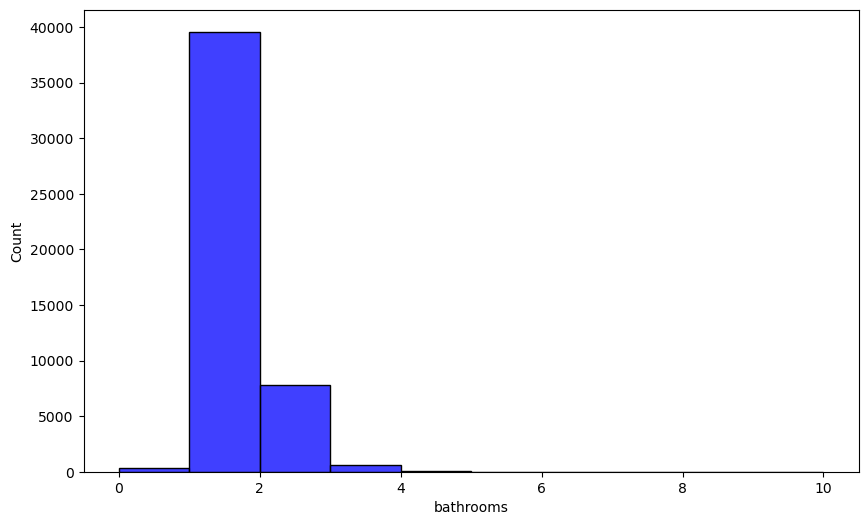

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['bathrooms'], bins=10, color='blue')
plt.show()

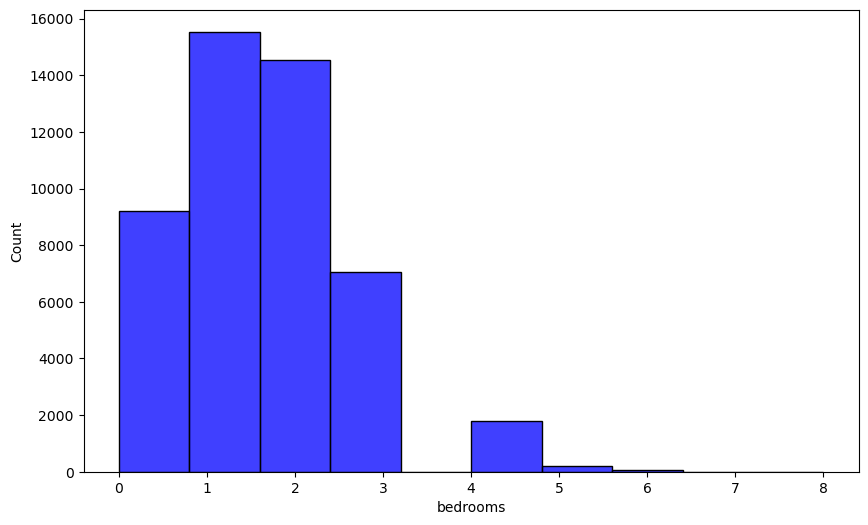

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['bedrooms'], bins=10,  color='blue')
plt.show()

Согласно гистограммам для ванных и спален выбросов нет

## 3.e Комплексный анализ

## 3.e.1

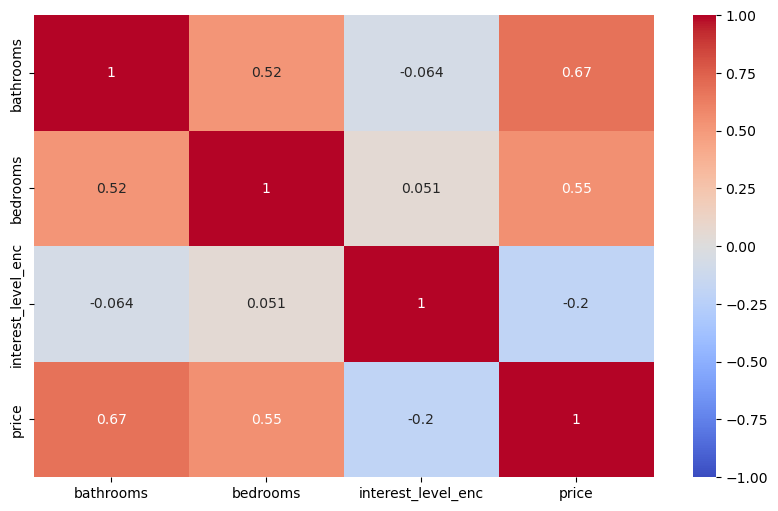

In [17]:
corr_data = filtered_df[['bathrooms', 'bedrooms', 'interest_level_enc', 'price']]
corr_matrix=corr_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Согласно тепловой корелляционной матрице признаки bedrooms и bathrooms коррелируют с price наиболее сильно

## 3.e.2

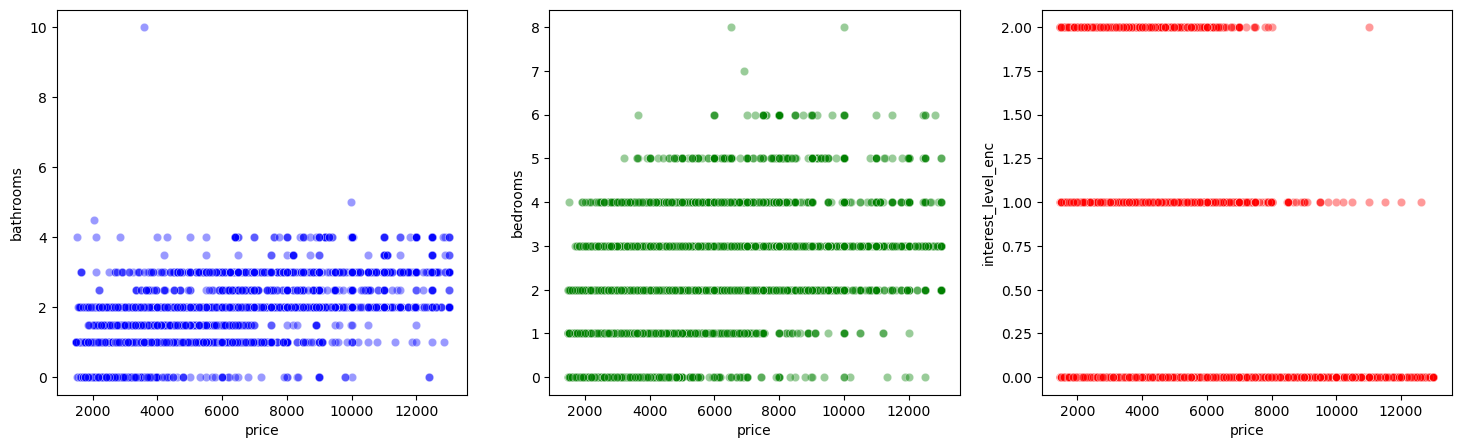

In [18]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='price', y='bathrooms', data=filtered_df, alpha=0.4, color='blue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='price', y='bedrooms', data=filtered_df, alpha=0.4, color='green')
plt.subplot(1, 3, 3)
sns.scatterplot(x='price', y='interest_level_enc', data=filtered_df, alpha=0.4, color='red')
plt.show()

# 4. Создание признаков

## 4.a Cоздадим три новых признака и построим корреляционную матрицу

In [19]:
filtered_df = filtered_df.copy()
filtered_df['price_per_room'] = filtered_df['price'] / (filtered_df['bedrooms'] + filtered_df['bathrooms'])
filtered_df['total_rooms'] = filtered_df['bedrooms'] + filtered_df['bathrooms']
filtered_df['bedrooms_squared'] = filtered_df['bedrooms'] ** 2
filtered_df

,bathrooms,bedrooms,interest_level_enc,price,price_per_room,total_rooms,bedrooms_squared
4,1.0,1,1,2400,1200.000000,2.0,1
6,1.0,2,0,3800,1266.666667,3.0,4
9,1.0,2,1,3495,1165.000000,3.0,4
10,1.5,3,1,3000,666.666667,4.5,9
15,1.0,0,0,2795,2795.000000,1.0,0
...,...,...,...,...,...,...,...
124000,1.0,3,0,2800,700.000000,4.0,9
124002,1.0,2,1,2395,798.333333,3.0,4
124004,1.0,1,1,1850,925.000000,2.0,1
124008,1.0,2,1,4195,1398.333333,3.0,4


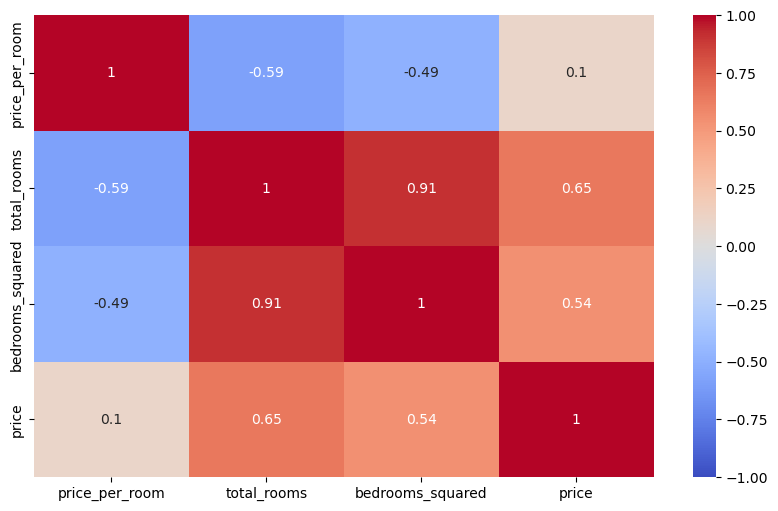

In [20]:
corr_data = filtered_df[['price_per_room', 'total_rooms', 'bedrooms_squared', 'price']]
corr_matrix=corr_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Новые признаки(кроме price_per_room) коррелируют с price на уровне старых признаков

## 4.d Разделение выборок на тренировочную и тестовую

In [21]:
X_train = filtered_df[['bathrooms', 'bedrooms']]
y_train = filtered_df['price'] 

In [22]:
test_df = pd.read_json('test.json')

In [23]:
print(test_df.columns.tolist())

['bathrooms', 'bedrooms', 'building_id', 'created', 'description', 'display_address', 'features', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 'price', 'street_address']


In [24]:
new_test_df=test_df[['bathrooms','bedrooms','price']]
new_test_df

,bathrooms,bedrooms,price
0,1.0,1,2950
1,1.0,2,2850
2,1.0,0,2295
3,1.0,2,2900
5,1.0,1,3254
...,...,...,...
124003,1.0,1,1700
124005,1.0,2,4195
124006,1.0,0,2400
124007,2.0,2,6895


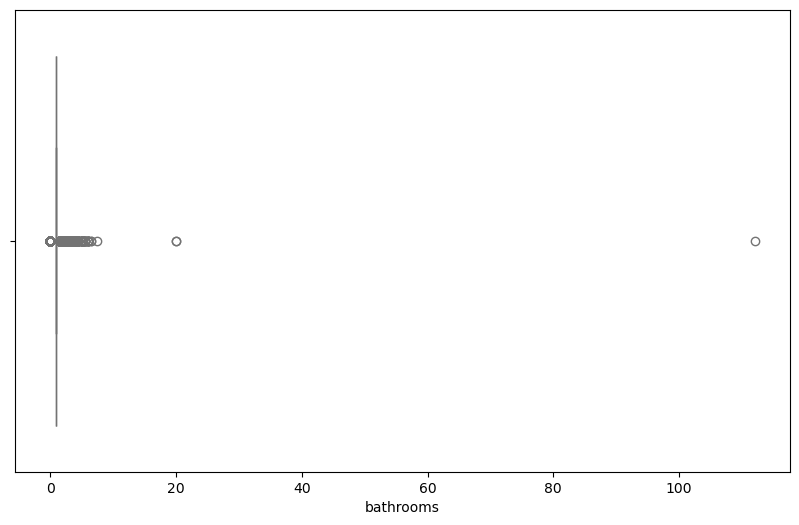

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_test_df, x='bathrooms', color='lightgreen')
plt.show()

## Очистка от выбросов

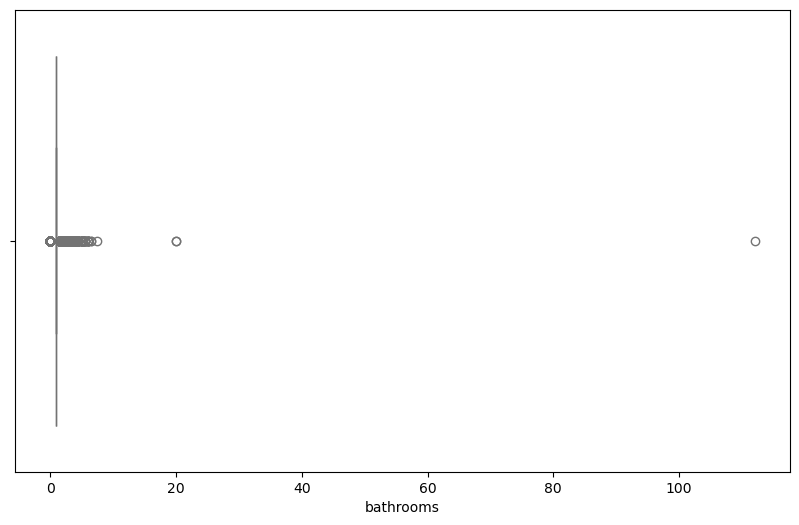

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_test_df, x='bathrooms', color='lightgreen')
plt.show()

In [27]:
lower = new_test_df['bathrooms'].quantile(0.01)  
upper = new_test_df['bathrooms'].quantile(0.99) 
filtered_test_df = new_test_df[(new_test_df['bathrooms'] >= lower) & (new_test_df['bathrooms'] <= upper)]

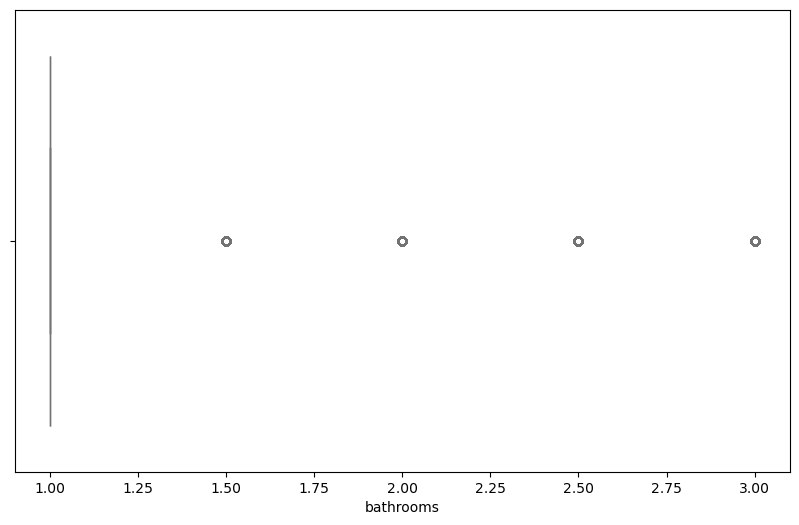

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_test_df, x='bathrooms', color='lightgreen')
plt.show()

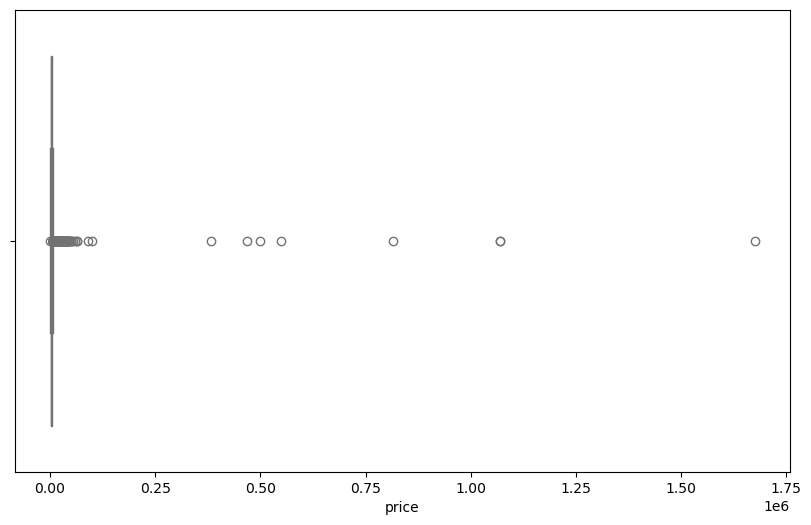

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_test_df, x='price', color='lightgreen')
plt.show()

In [30]:
lower = filtered_test_df['price'].quantile(0.01)  
upper = filtered_test_df['price'].quantile(0.99) 
filtered_test_df = filtered_test_df[(filtered_test_df['price'] >= lower) & (filtered_test_df['price'] <= upper)]

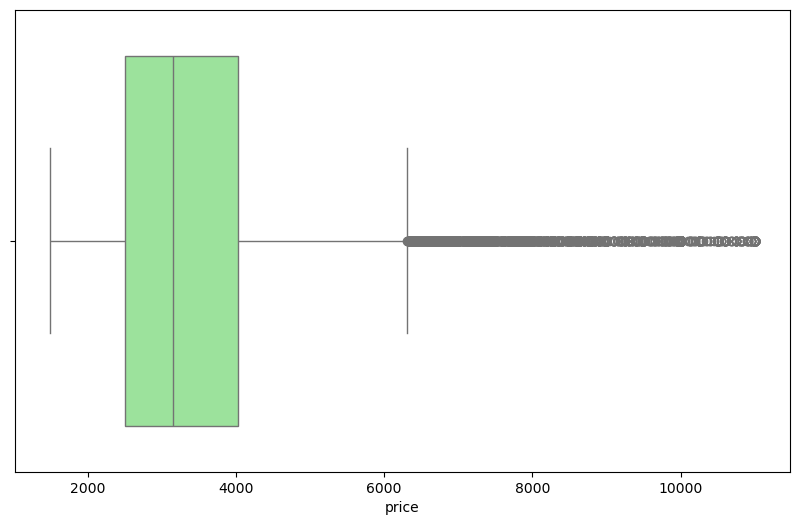

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_test_df, x='price', color='lightgreen')
plt.show()

In [32]:
X_test=filtered_test_df[['bathrooms','bedrooms']]
y_test=filtered_test_df['price']

## 4.e Инициализация PolynomialFeatures() со степенью 10.

In [33]:
poly = PolynomialFeatures(degree=10, include_bias=False)

## 4.f Применим PolynomialFeatures() для преобразования обучающих и тестовых данных

In [34]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 5. Обучение

## 5.a

In [35]:
result_MAE=pd.DataFrame(columns=['model','train','test'])
result_RMSE=pd.DataFrame(columns=['model','train','test'])

## 5.b.1 Линейная регрессия

In [36]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

## 5.b.2

In [37]:
y_train_pred_lr = lr.predict(X_train_poly)
y_test_pred_lr = lr.predict(X_test_poly)

## 5.b.3

In [38]:
mae_train = mean_absolute_error(y_train, y_train_pred_lr)
mae_test = mean_absolute_error(y_test, y_test_pred_lr)

## 5.b.4

In [39]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

## 5.b.5 

In [40]:
new_idx = len(result_MAE)
result_MAE.loc[new_idx] = {
    'model': 'linear_regression',
    'train': mae_train,
    'test': mae_test
}

new_idx = len(result_RMSE)
result_RMSE.loc[new_idx] = {
    'model': 'linear_regression',
    'train': rmse_train,
    'test': rmse_test
}

In [41]:
result_MAE

,model,train,test
0,linear_regression,756.045007,4512.36402


In [42]:
result_RMSE 

,model,train,test
0,linear_regression,1077.483598,853311.525024


## 5.c.1 Дерево решений

In [43]:
tree_model = DecisionTreeRegressor(random_state=21)
tree_model.fit(X_train_poly, y_train)

DecisionTreeRegressor(random_state=21)

## 5.c.2

In [44]:
y_train_pred_dt = tree_model.predict(X_train_poly)
y_test_pred_dt = tree_model.predict(X_test_poly)

## 5.c.3

In [45]:
dt_mae_train = mean_absolute_error(y_train, y_train_pred_dt)
dt_mae_test = mean_absolute_error(y_test, y_test_pred_dt)

## 5.c.4

In [46]:
dt_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
dt_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

## 5.c.5

In [47]:
new_idx = len(result_MAE)
result_MAE.loc[new_idx] = {
    'model': 'decision_tree',
    'train': dt_mae_train,
    'test': dt_mae_test
}
new_idx = len(result_RMSE)
result_RMSE.loc[new_idx] = {
    'model': 'decision_tree',
    'train': dt_mae_train,
    'test': dt_mae_test
}

In [48]:
result_MAE

,model,train,test
0,linear_regression,756.045007,4512.36402
1,decision_tree,756.044735,739.10854


In [49]:
result_RMSE

,model,train,test
0,linear_regression,1077.483598,853311.525024
1,decision_tree,756.044735,739.108540


## 5.d.1 Наивные модели

In [50]:
mean_price = y_train.mean()
median_price = y_train.median()

In [51]:
y_train_pred_mean = [mean_price] * len(y_train)
y_train_pred_median = [median_price] * len(y_train)

y_test_pred_mean = [mean_price] * len(y_test)
y_test_pred_median = [median_price] * len(y_test)

## 5.d.2

In [52]:
mae_train_mean = mean_absolute_error(y_train, y_train_pred_mean)
mae_test_mean = mean_absolute_error(y_test, y_test_pred_mean)
mae_train_median = mean_absolute_error(y_train, y_train_pred_median)
mae_test_median = mean_absolute_error(y_test, y_test_pred_median)

## 5.d.3

In [53]:
rmse_train_mean = np.sqrt(mean_squared_error(y_train, y_train_pred_mean))
rmse_test_mean = np.sqrt(mean_squared_error(y_test, y_test_pred_mean))
rmse_train_median = np.sqrt(mean_squared_error(y_train, y_train_pred_median))
rmse_test_median = np.sqrt(mean_squared_error(y_test, y_test_pred_median))

## 5.d.4

In [54]:
new_idx = len(result_MAE)
result_MAE.loc[new_idx] = {'model': 'naive_mean', 'train': mae_train_mean, 'test': mae_test_mean}
new_idx = len(result_MAE)
result_MAE.loc[new_idx] = {'model': 'naive_median', 'train': mae_train_median, 'test': mae_test_median}
new_idx = len(result_RMSE)
result_RMSE.loc[new_idx] = {'model': 'naive_mean', 'train': rmse_train_mean, 'test': rmse_test_mean}
new_idx = len(result_RMSE)
result_RMSE.loc[new_idx] = {'model': 'naive_median', 'train': rmse_train_median, 'test': rmse_test_median}

## 5.e.1 Результаты

In [55]:
result_MAE

,model,train,test
0,linear_regression,756.045007,4512.364020
1,decision_tree,756.044735,739.108540
2,naive_mean,1139.192515,1096.386736
3,naive_median,1086.210505,1041.654329


In [56]:
result_RMSE

,model,train,test
0,linear_regression,1077.483598,853311.525024
1,decision_tree,756.044735,739.108540
2,naive_mean,1597.646655,1465.028943
3,naive_median,1644.236439,1502.444106


## 5.e.2 Самая лучшая модель - decision tree